**PYSPARK İLE VERİ ANALİZİ ÖRNEĞİ**

In [1]:
pip install pyspark

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum as _sum, count, avg, when
from pyspark.ml.feature import StringIndexer

In [4]:
spark=SparkSession.builder \
.appName("Electric Vehicle Population Data") \
.config("spark.some.config.option","some-value") \
.getOrCreate()

In [6]:
data=spark.read.csv("Electric_Vehicle_Population_Data.csv",header=True, inferSchema=True)

In [7]:
data.show()

+----------+---------+------------+-----+-----------+----------+---------+----------+---------------------+-------------------------------------------------+--------------+---------+--------------------+--------------+--------------------+--------------------+-----------------+
|VIN (1-10)|   County|        City|State|Postal Code|Model Year|     Make|     Model|Electric Vehicle Type|Clean Alternative Fuel Vehicle (CAFV) Eligibility|Electric Range|Base MSRP|Legislative District|DOL Vehicle ID|    Vehicle Location|    Electric Utility|2020 Census Tract|
+----------+---------+------------+-----+-----------+----------+---------+----------+---------------------+-------------------------------------------------+--------------+---------+--------------------+--------------+--------------------+--------------------+-----------------+
|5UXTA6C0XM|   Kitsap|     Seabeck|   WA|      98380|      2021|      BMW|        X5| Plug-in Hybrid El...|                             Clean Alternative...|      

In [8]:
data.printSchema()

root
 |-- VIN (1-10): string (nullable = true)
 |-- County: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Postal Code: integer (nullable = true)
 |-- Model Year: integer (nullable = true)
 |-- Make: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Electric Vehicle Type: string (nullable = true)
 |-- Clean Alternative Fuel Vehicle (CAFV) Eligibility: string (nullable = true)
 |-- Electric Range: integer (nullable = true)
 |-- Base MSRP: integer (nullable = true)
 |-- Legislative District: integer (nullable = true)
 |-- DOL Vehicle ID: integer (nullable = true)
 |-- Vehicle Location: string (nullable = true)
 |-- Electric Utility: string (nullable = true)
 |-- 2020 Census Tract: long (nullable = true)



In [9]:
null_counts=data.select([_sum(col(c).isNull().cast("int")).alias(c) for c in data.columns])
null_counts.show()

+----------+------+----+-----+-----------+----------+----+-----+---------------------+-------------------------------------------------+--------------+---------+--------------------+--------------+----------------+----------------+-----------------+
|VIN (1-10)|County|City|State|Postal Code|Model Year|Make|Model|Electric Vehicle Type|Clean Alternative Fuel Vehicle (CAFV) Eligibility|Electric Range|Base MSRP|Legislative District|DOL Vehicle ID|Vehicle Location|Electric Utility|2020 Census Tract|
+----------+------+----+-----+-----------+----------+----+-----+---------------------+-------------------------------------------------+--------------+---------+--------------------+--------------+----------------+----------------+-----------------+
|         0|     4|   4|    0|          4|         0|   0|    0|                    0|                                                0|             5|        5|                 445|             0|              10|               4|                4|


In [10]:
columns_to_drop=['County','City','Postal Code','Electric Utility','2020 Census Tract','Electric Range']
data=data.na.drop(subset=columns_to_drop).drop('Legislative District')

In [11]:
data.show()

+----------+---------+------------+-----+-----------+----------+---------+----------+---------------------+-------------------------------------------------+--------------+---------+--------------+--------------------+--------------------+-----------------+
|VIN (1-10)|   County|        City|State|Postal Code|Model Year|     Make|     Model|Electric Vehicle Type|Clean Alternative Fuel Vehicle (CAFV) Eligibility|Electric Range|Base MSRP|DOL Vehicle ID|    Vehicle Location|    Electric Utility|2020 Census Tract|
+----------+---------+------------+-----+-----------+----------+---------+----------+---------------------+-------------------------------------------------+--------------+---------+--------------+--------------------+--------------------+-----------------+
|5UXTA6C0XM|   Kitsap|     Seabeck|   WA|      98380|      2021|      BMW|        X5| Plug-in Hybrid El...|                             Clean Alternative...|            30|        0|     267929112|POINT (-122.87283...|PUGET SO

In [12]:
data=data.na.fill({'Vehicle Location':'0'})
data.show()

+----------+---------+------------+-----+-----------+----------+---------+----------+---------------------+-------------------------------------------------+--------------+---------+--------------+--------------------+--------------------+-----------------+
|VIN (1-10)|   County|        City|State|Postal Code|Model Year|     Make|     Model|Electric Vehicle Type|Clean Alternative Fuel Vehicle (CAFV) Eligibility|Electric Range|Base MSRP|DOL Vehicle ID|    Vehicle Location|    Electric Utility|2020 Census Tract|
+----------+---------+------------+-----+-----------+----------+---------+----------+---------------------+-------------------------------------------------+--------------+---------+--------------+--------------------+--------------------+-----------------+
|5UXTA6C0XM|   Kitsap|     Seabeck|   WA|      98380|      2021|      BMW|        X5| Plug-in Hybrid El...|                             Clean Alternative...|            30|        0|     267929112|POINT (-122.87283...|PUGET SO

In [13]:
data.groupBy("County").agg(count("VIN (1-10)").alias("EV_Count")).orderBy("EV_Count",ascending=False).show()

+---------+--------+
|   County|EV_Count|
+---------+--------+
|     King|  107111|
|Snohomish|   25392|
|   Pierce|   16677|
|    Clark|   12537|
| Thurston|    7719|
|   Kitsap|    6998|
|  Spokane|    5700|
|  Whatcom|    5110|
|   Benton|    2624|
|   Skagit|    2366|
|   Island|    2244|
|   Yakima|    1284|
|   Chelan|    1279|
|  Clallam|    1253|
|Jefferson|    1140|
|  Cowlitz|    1097|
| San Juan|    1039|
|    Mason|     980|
|    Lewis|     954|
| Kittitas|     778|
+---------+--------+
only showing top 20 rows



In [14]:
county_ev_counts=data.groupBy("County").agg(count("VIN (1-10)").alias("EV_Count"))
county_ev_counts_pd=county_ev_counts.toPandas()

In [16]:
county_ev_counts_pd_sorted=county_ev_counts_pd.sort_values(by='EV_Count',ascending=False).head(10)

In [18]:
from matplotlib import pyplot as plt

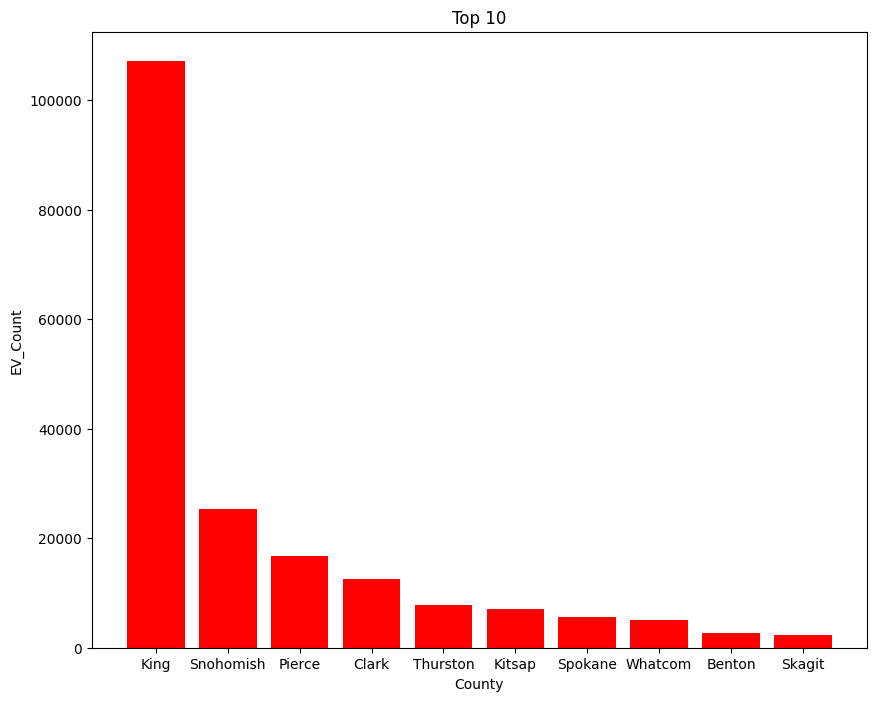

In [20]:
plt.figure(figsize=(10,8))
plt.bar(county_ev_counts_pd_sorted['County'],county_ev_counts_pd_sorted['EV_Count'],color='red')
plt.xlabel('County')
plt.ylabel('EV_Count')
plt.title('Top 10')
plt.show()